In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


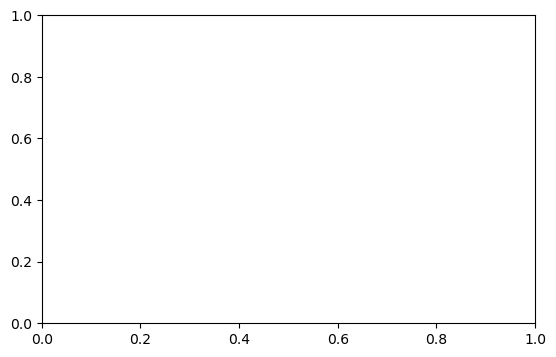

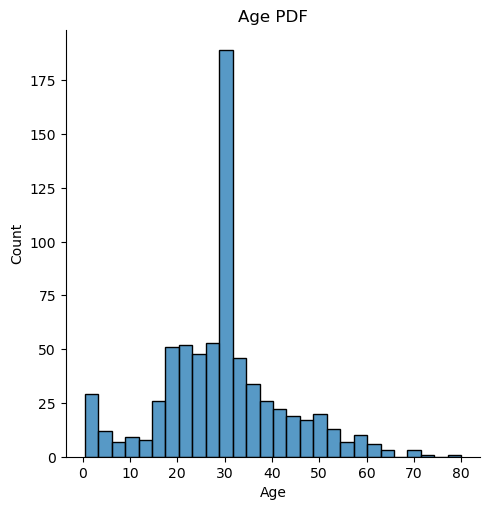

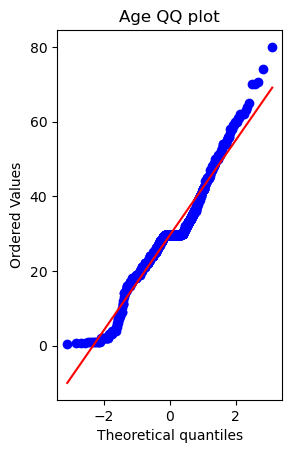

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.displot(x_train['Age'])
plt.title('Age PDF')
plt.show()


plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


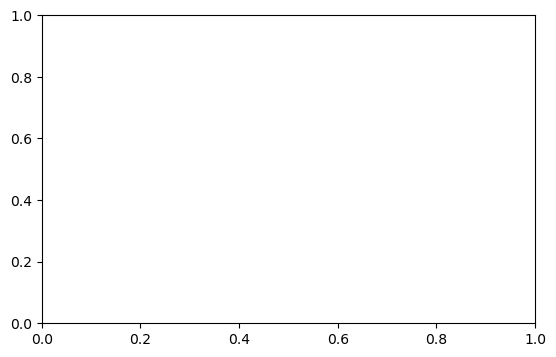

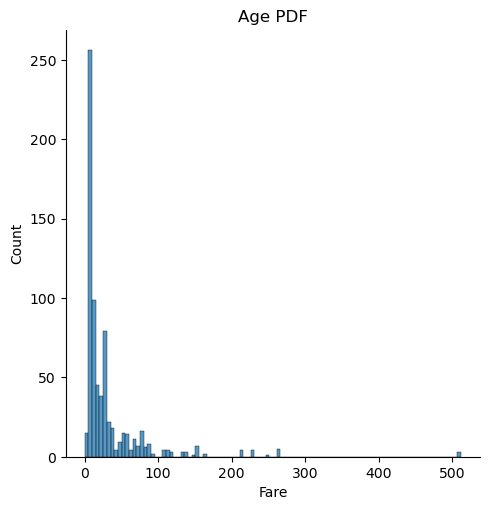

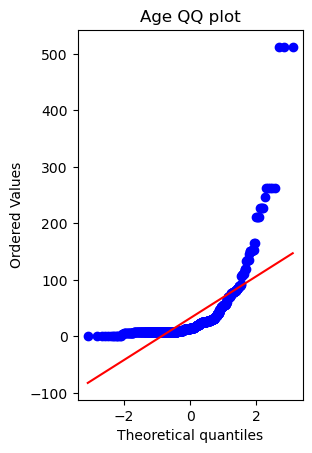

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.displot(x_train['Fare'])
plt.title('Age PDF')
plt.show()

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Age QQ plot')
plt.show()

In [12]:
clf = LogisticRegression()
clf2=DecisionTreeClassifier()

In [13]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred1=clf2.predict(x_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred))


Accuracy LR 0.6480446927374302
Accuracy DT 0.6480446927374302


In [16]:
trf =FunctionTransformer(func=np.log1p)

In [18]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.fit_transform(x_test)

In [20]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred = clf2.predict(x_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred))


Accuracy LR 0.659217877094972
Accuracy DT 0.659217877094972


In [22]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print("LR",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
LR 0.6621972534332085


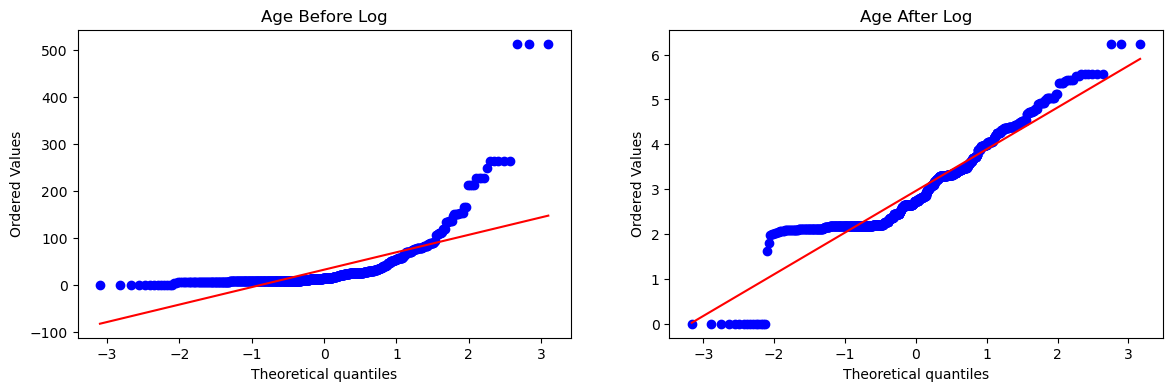

In [23]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_transformed['Fare'],dist='norm',plot=plt)
plt.title('Age After Log')

plt.show()

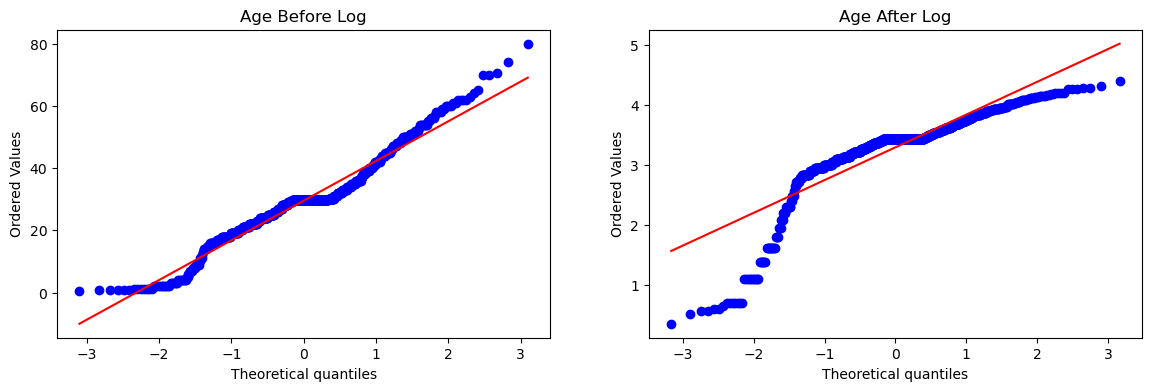

In [24]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_transformed['Age'],dist='norm',plot=plt)
plt.title('Age After Log')

plt.show()

In [26]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='Passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)

InvalidParameterError: The 'remainder' parameter of ColumnTransformer must be a str among {'drop', 'passthrough'}, an object implementing 'fit' and 'transform' or an object implementing 'fit_transform' and 'transform'. Got 'Passthrough' instead.